# BHUSHAN PATIL(234161015)

In [145]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split , KFold
from sklearn.base import clone
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import missingno as miss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier


In [125]:
df = pd.read_csv("loan_approval_dataset_1.csv")

# Exploratory data analysis (EDA) 

<Axes: >

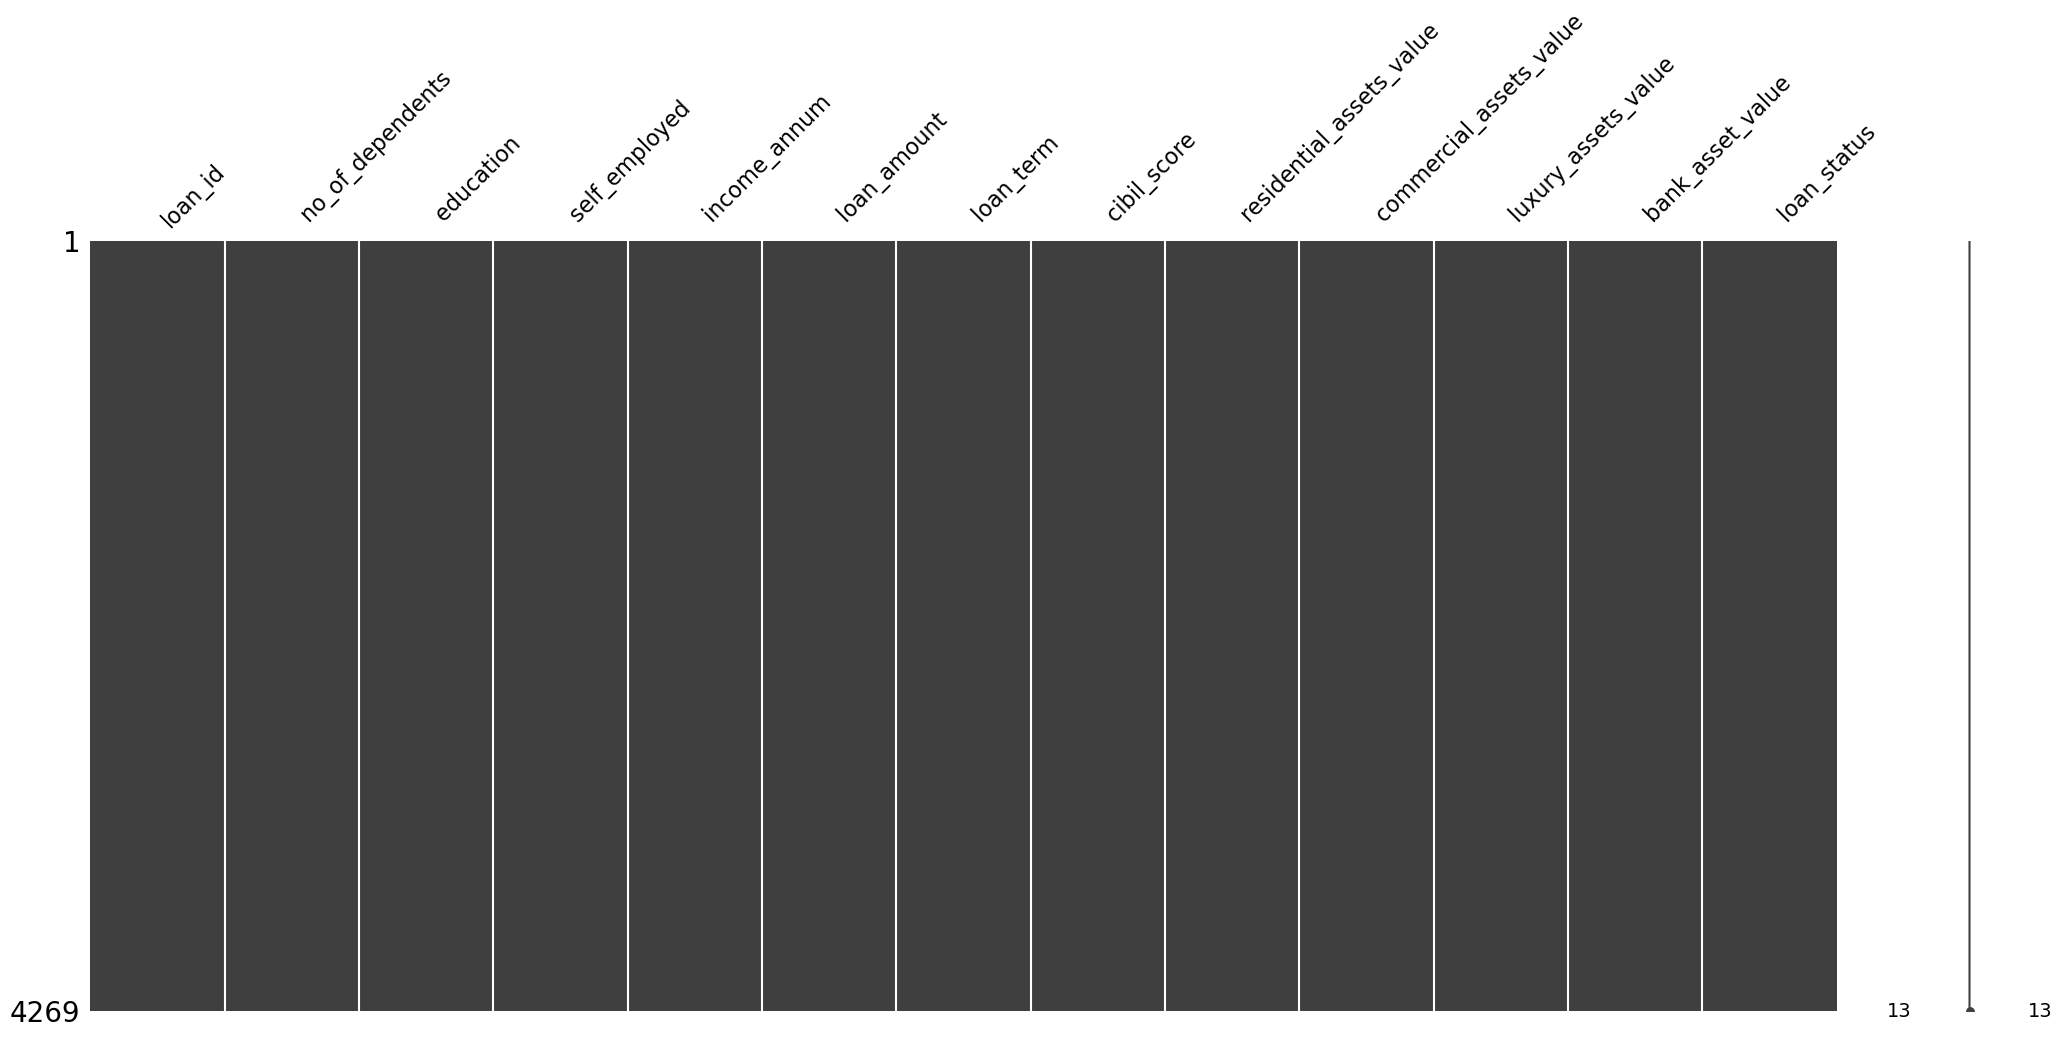

In [126]:
miss.matrix(df)

In [127]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

 ***There is no null value in the dataset***                                     

In [128]:
df1 = df[df[' self_employed'] == " Yes"]
df2 = df[df[' loan_status'] == ' Approved']
res = (df1.shape[0] / df2.shape[0])
print("Probaliy of getting the loan if you are self employeed --> " , res)

Probaliy of getting the loan if you are self employeed -->  0.8094879518072289


In [129]:
df1 = df[df[" loan_status"]==" Approved"]
print(f"Average cibil score for granted loans --> {df1[' cibil_score'].mean()}")

Average cibil score for granted loans --> 703.4619728915662


In [130]:

fig = px.histogram(df, x=' cibil_score', color=' loan_status', nbins=5, title='CIBIL Score Distribution by Loan Status')

# Show the plot
fig.show()


 The distribution of CIBIL scores categorized by loan status: approved (blue) and rejected (red). Each bar represents the count of loans for a specific range of CIBIL scores. The counts are stacked, with approved loans on top of rejected ones for each score range. The histogram suggests a higher number of rejections in lower score ranges, and a predominance of approvals in higher ranges, illustrating the relationship between credit scores and loan approval likelihood.

In [131]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

***Visual of categorical variable***

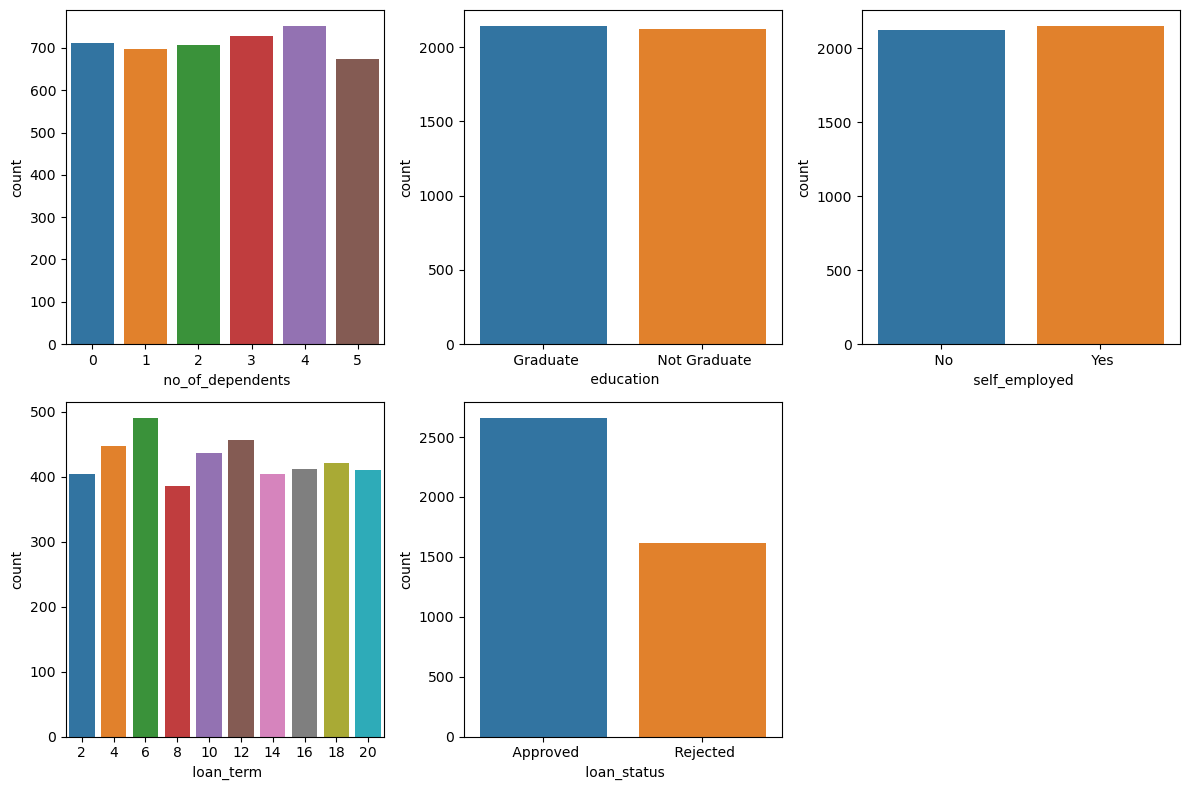

In [132]:
cat_value = [' no_of_dependents', ' education', ' self_employed', ' loan_term', ' loan_status']

plt.figure(figsize=(12,8))
for i in enumerate(cat_value):
    plt.subplot(2,3,i[0]+1)
    sns.countplot(x=i[1], data=df)
plt.tight_layout()

***Applicants are distributed almost evenly across the number of dependents from 0 to 5.***<br>
***There are slight more graduates than non-graduates applying for loans.***<br>
***The number of applicants who are not self-employed exceeds those who are self-employed.***<br>
***Loan term preferences vary, with some terms being more popular than others.***<br>
***More loans have been approved than rejected.***<br>

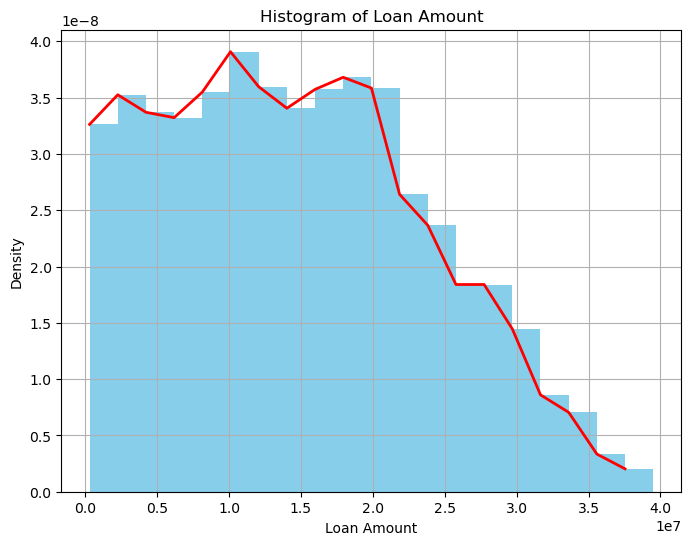

In [133]:
plt.figure(figsize=(8, 6))
plt.hist(df[' loan_amount'], bins=20, color='skyblue', density=True)  # Set density=True
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.grid(True)

# Plotting density line
density_values, bins, _ = plt.hist(df[' loan_amount'], bins=20, color='skyblue', density=True, alpha=0)  # Calculate density values
plt.plot(bins[:-1], density_values, linestyle='-', color='red', linewidth=2)  # Plot density line

plt.show()

***The x-axis represents loan amounts, which scale from 0 to 4e7 (40,000,000), and the y-axis represents density, a measure of probability. The bars indicate the frequency of loan amounts within the dataset, and the red line likely represents a kernel density estimate (KDE) which provides a smooth estimate of the distribution. The majority of loans are clustered at the lower end of the loan amount range, with frequency and density decreasing as loan amounts increase. This is a common distribution in financial datasets, where smaller loans are more frequent than larger ones.***

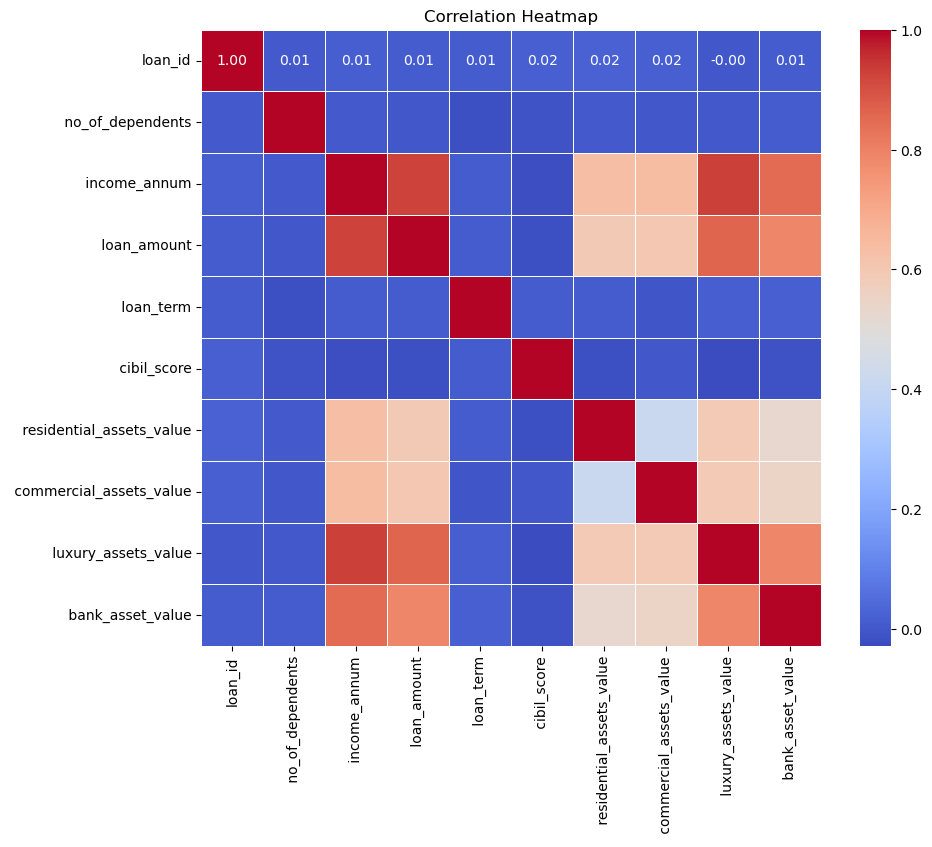

In [134]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

***'no_of_dependents' shows no strong correlation with any other variables, as indicated by the pale squares in its row.***<br>
***'income_annum' (annual income) and 'loan_amount' have a notable positive correlation, suggesting that higher income is associated with larger loan amounts.***<br>
***'loan_amount' and 'loan_term' also appear positively correlated, indicating that larger loans may have longer repayment terms.***<br>
***'luxury_assets_value' and 'bank_asset_value' exhibit some level of positive correlation, suggesting that individuals with higher luxury asset values also tend to have higher bank asset values.***

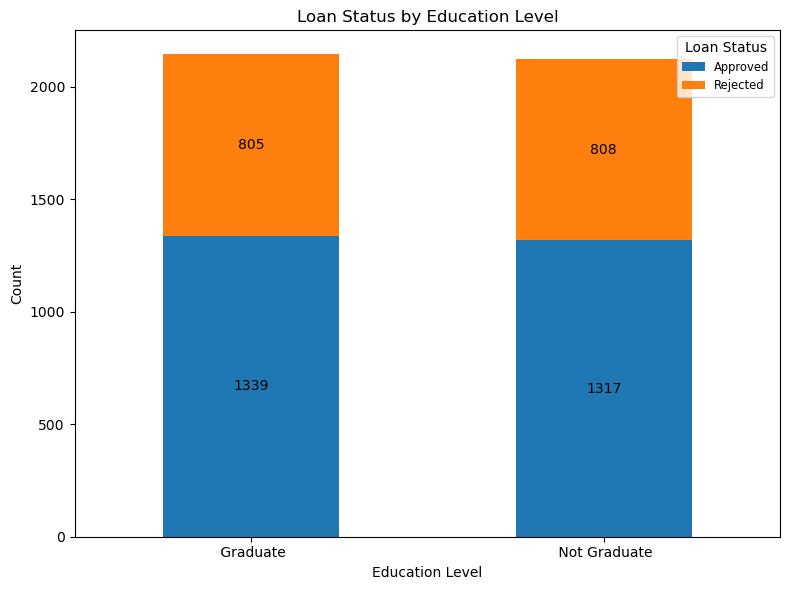

In [135]:
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()
if 'education' in df.columns and 'loan_status' in df.columns:
    counts = df.groupby(['education', 'loan_status']).size().unstack()
    ax = counts.plot(kind='bar', stacked=True, figsize=(8, 6))
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2, '{:.0f}'.format(p.get_height()), ha='center', va='center')
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'], fontsize='small') 
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [136]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

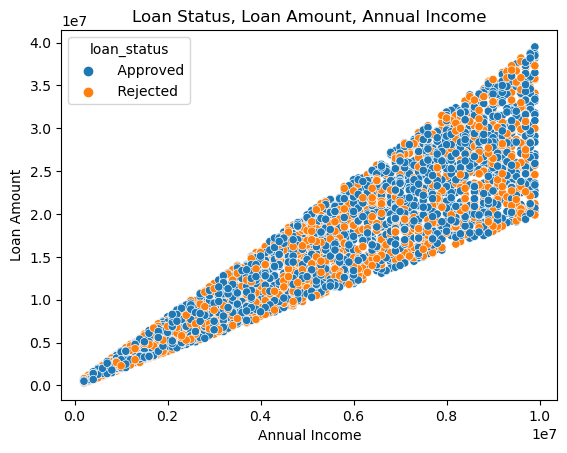

In [137]:
sns.scatterplot(x=df['income_annum'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

As annual income rises, so does the loan amount. However, the relationship between annual income and loan status appears less clear.
Lower-income applicants tend to have a narrower range of loan amounts, whereas those with higher incomes exhibit a broader range. Lenders typically scrutinize loan amounts against annual incomes to ensure applicants can repay loans. Consequently, individuals with higher incomes may enjoy greater flexibility in loan amounts, benefiting both themselves and lenders."

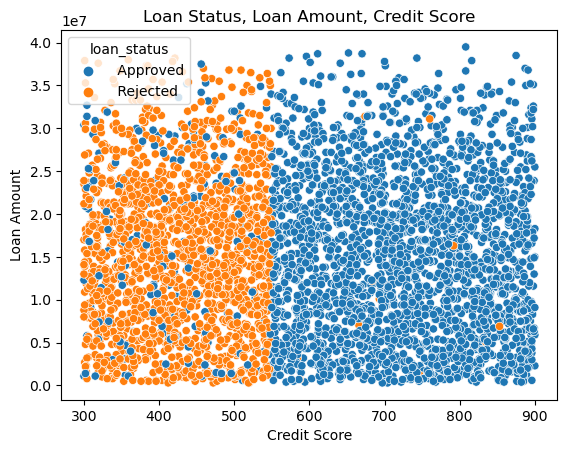

In [138]:
sns.scatterplot(x=df['cibil_score'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()




"The loan status exhibits a distinct division around credit scores of 550-560. Put differently, credit score plays a crucial role in determining loan status, with a clear demarcation evident within this score range."

# DATA PREPROCESSING

Drop unnecessary column

In [139]:
df.drop(['loan_id'], axis=1, inplace=True)

In [140]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [141]:
# Encode categorical variable using one-hot encoding
onehot_encoded = pd.get_dummies(df['education'], prefix='education')
df = pd.concat([df, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(df['self_employed'], prefix='self_employed')
df = pd.concat([df, onehot_encoded], axis=1)
df.drop(['education', 'self_employed'], axis=1, inplace=True)
target_col = df.pop('loan_status')
df['loan_status'] = target_col  # Add the target column at the last position
# Mapping values to 1 and 0
status_mapping = {' Approved': 1, ' Rejected': 0}
df['loan_status'] = df['loan_status'].map(status_mapping)

In [142]:
df

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,True,False,True,False,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,False,True,False,True,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,True,False,True,False,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,True,False,True,False,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,True,False,False,True,0
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,False,True,False,True,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,False,True,True,False,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,False,True,True,False,1


In [143]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
# Split the data into training and testing set
X1, X_test, y1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size=0.2, random_state=42)

# LogisticRegression

In [144]:
logistic_model = LogisticRegression()
# Fit the model on the training data
logistic_model.fit(X1, y1)
# Predict the target for the test data
y_pred = logistic_model.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate a classification report
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6288056206088993


# KNeighborsClassifier

Test Set Metrics:
Accuracy: 0.5784543325526932
F1 Score: 0.6901893287435457
Precision: 0.6405750798722045
Recall: 0.7481343283582089
Confusion Matrix:
 [[ 93 225]
 [135 401]]


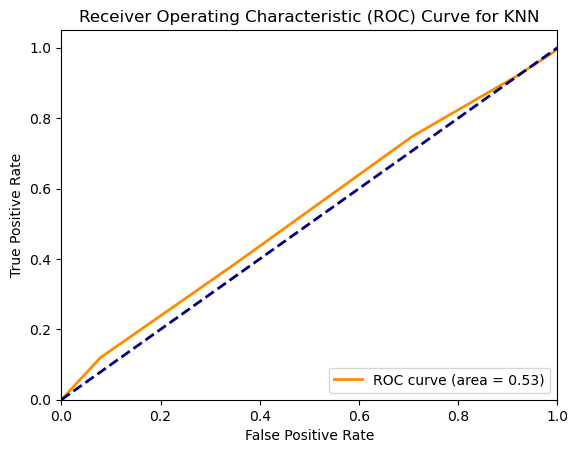

In [146]:

knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X1, y1)

# Make predictions on the test set
y_pred_test = knn.predict(X_test)

# Calculate metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Compute ROC curve and ROC area for the test set

fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Print all metrics
print("Test Set Metrics:")
print("Accuracy:", accuracy_test)
print("F1 Score:", f1_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("Confusion Matrix:\n", conf_matrix_test)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()


**The image shows the performance metrics and ROC curve for a KNN classifier. The model has moderate accuracy and F1 score, with values around 0.58 and 0.69 respectively. The precision and recall scores are also moderate, suggesting room for improvement. The ROC curve is close to the diagonal line, with an area of 0.53, indicating performance only slightly better than random guessing.**

# DecisionTreeClassifier with k-fold

***Hyperparameter is decided by grid search***

Best Model's Validation Accuracy: 0.9824046920821115
Test Set Metrics:
Accuracy: 0.9800936768149883
F1 Score: 0.9842154131847725
Precision: 0.9796672828096118
Recall: 0.9888059701492538
Confusion Matrix:
 [[307  11]
 [  6 530]]


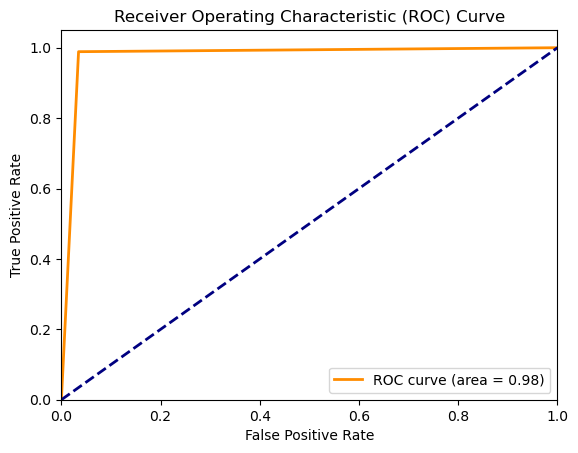

In [116]:



k = 10
max_depth = 15
kf = KFold(n_splits=k, shuffle=True, random_state=42)

best_accuracy = 0
best_model_dt = None

# Iterate over the folds
for train_index, val_index in kf.split(X1):
    X_train_fold, X_val_fold = X1[train_index], X1[val_index]
    y_train_fold, y_val_fold = y1[train_index], y1[val_index]

    # Initialize and train Decision Tree Classifier
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train_fold, y_train_fold)

    # Predict on validation fold
    y_pred = dt.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred)

    # Update best model if current model performs better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_dt = dt

# Train the best model on the full dataset
best_model_dt.fit(X1, y1)

# Make predictions on the test set
y_pred_test = best_model_dt.predict(X_test)

# Calculate different metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)


# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, best_model_dt.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)



# Print all metrics
print("Best Model's Validation Accuracy:", best_accuracy)
print("Test Set Metrics:")
print("Accuracy:", accuracy_test)
print("F1 Score:", f1_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("Confusion Matrix:\n", conf_matrix_test)


# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Above image displays performance metrics and a Receiver Operating Characteristic (ROC) curve for a classification model. The model has high accuracy, precision, and recall, with an F1 score close to 1, indicating excellent performance. The confusion matrix suggests a small number of false positives and false negatives. The ROC curve is near the top-left corner, with an area under the curve (AUC) of 0.97, showing a high true positive rate and low false positive rate, further indicating a strong model performance.**

# RandomForestClassifier with K-fold

Best Model's Validation Accuracy: 0.9912280701754386
Test Set Metrics:
Accuracy: 0.9765807962529274
F1 Score: 0.9814471243042672
Precision: 0.9795918367346939
Recall: 0.9850746268656716
Confusion Matrix:
 [[307  11]
 [  8 528]]


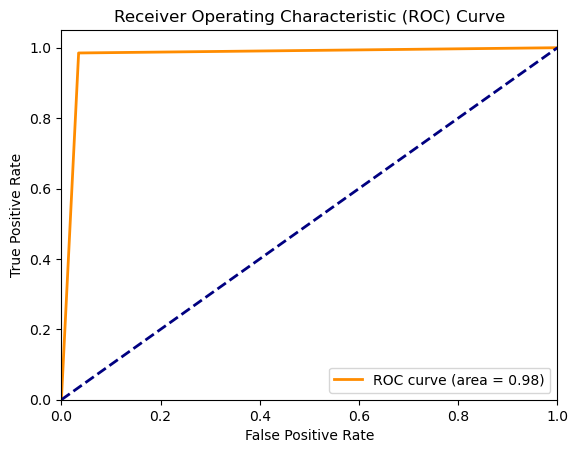

In [87]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
best_accuracy = 0
best_model_rf = None

for train_index, val_index in kf.split(X1):
    X_train_fold, X_val_fold = X1[train_index], X1[val_index]
    y_train_fold, y_val_fold = y1[train_index], y1[val_index]

    rf = RandomForestClassifier(n_estimators=200)
    rf.fit(X_train_fold, y_train_fold)

    y_pred = rf.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)

    # Check if current model has higher accuracy than the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_rf = rf



y_pred_test = best_model_rf.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)



# Print all metrics
print("Best Model's Validation Accuracy:", best_accuracy)
print("Test Set Metrics:")
print("Accuracy:", accuracy_test)
print("F1 Score:", f1_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("Confusion Matrix:\n", conf_matrix_test)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# XGBClassifier

In [85]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
best_accuracy = 0
best_model_xgb = None

for train_index, val_index in kf.split(X1):
    X_train_fold, X_val_fold = X1[train_index], X1[val_index]
    y_train_fold, y_val_fold = y1[train_index], y1[val_index]

    xgb = XGBClassifier(n_estimators=200)
    xgb.fit(X_train_fold, y_train_fold)

    y_pred = xgb.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)

    # Check if current model has higher accuracy than the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_xgb = xgb

y_pred_test = best_model_xgb.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Best Model's Validation Accuracy:", best_accuracy)
print("Accuracy on test Set:", accuracy_test)
print("F1 Score on test Set:", f1_test)



Best Model's Validation Accuracy: 0.9883040935672515
Accuracy on test Set: 0.977751756440281
F1 Score on test Set: 0.9822926374650514


# Hyperparameter tuning is essential to identify the best parameters that optimize model performance

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score

# Define hyperparameters
param_grid = {
    'max_depth': [5,10,15,20,25,30,35,40,45,50],  # Add more values for max_depth
    'k': [5, 7, 8,9,10, 12, 15, 20, 25]  # Add more values for k
}

# Define K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

best_accuracy = 0
best_model_dt = None
best_hyperparameters = None

# Iterate over each combination of hyperparameters
for max_depth in param_grid['max_depth']:
    for k in param_grid['k']:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        accuracy_sum = 0
        
        # Perform cross-validation
        for train_index, val_index in kf.split(X1):
            X_train_fold, X_val_fold = X1[train_index], X1[val_index]
            y_train_fold, y_val_fold = y1[train_index], y1[val_index]

            dt = DecisionTreeClassifier(max_depth=max_depth)
            dt.fit(X_train_fold, y_train_fold)

            y_pred = dt.predict(X_val_fold)

            accuracy = accuracy_score(y_val_fold, y_pred)
            accuracy_sum += accuracy

        # Calculate average accuracy for the current hyperparameters
        avg_accuracy = accuracy_sum / k

        # Check if the current hyperparameters perform better
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_model_dt = DecisionTreeClassifier(max_depth=max_depth)
            best_model_dt.fit(X1, y1)
            best_hyperparameters = {'max_depth': max_depth, 'k': k}

# Make predictions on the test set using the best model
y_pred_test = best_model_dt.predict(X_test)

# Calculate accuracy and F1 score on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print evaluation metrics and best hyperparameters
print("Best Model's Validation Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_hyperparameters)
print("Accuracy on test Set:", accuracy_test)
print("F1 Score on test Set:", f1_test)


Best Model's Validation Accuracy: 0.9786279207563696
Best Hyperparameters: {'max_depth': 10, 'k': 15}
Accuracy on test Set: 0.9695550351288056
F1 Score on test Set: 0.9759704251386322


# Hyperparameters Tuneing for RandomForestClassifier with GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 15, 20, 25],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Define K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

best_accuracy = 0
best_model_rf = None
best_hyperparameters = None

# Iterate over each combination of hyperparameters
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                accuracy_sum = 0
                
                # Perform cross-validation
                for train_index, val_index in kf.split(X1):
                    X_train_fold, X_val_fold = X1[train_index], X1[val_index]
                    y_train_fold, y_val_fold = y1[train_index], y1[val_index]

                    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                                max_depth=max_depth,
                                                min_samples_split=min_samples_split,
                                                min_samples_leaf=min_samples_leaf)
                    rf.fit(X_train_fold, y_train_fold)

                    y_pred = rf.predict(X_val_fold)

                    accuracy = accuracy_score(y_val_fold, y_pred)
                    accuracy_sum += accuracy

                # Calculate average accuracy for the current hyperparameters
                avg_accuracy = accuracy_sum / kf.get_n_splits()

                # Check if the current hyperparameters perform better
                if avg_accuracy > best_accuracy:
                    best_accuracy = avg_accuracy
                    best_model_rf = RandomForestClassifier(n_estimators=n_estimators, 
                                                            max_depth=max_depth,
                                                            min_samples_split=min_samples_split,
                                                            min_samples_leaf=min_samples_leaf)
                    best_model_rf.fit(X1, y1)
                    best_hyperparameters = {'n_estimators': n_estimators, 
                                            'max_depth': max_depth,
                                            'min_samples_split': min_samples_split,
                                            'min_samples_leaf': min_samples_leaf}

# Make predictions on the test set using the best model
y_pred_test = best_model_rf.predict(X_test)

# Calculate accuracy and F1 score on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print evaluation metrics and best hyperparameters
print("Best Model's Validation Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_hyperparameters)
print("Accuracy on test Set:", accuracy_test)
print("F1 Score on test Set:", f1_test)


Best Model's Validation Accuracy: 0.980381917648471
Best Hyperparameters: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1}
Accuracy on test Set: 0.9730679156908665
F1 Score on test Set: 0.9786046511627907


----------------------------------------------------------------------------------------------------------------------

# Typically in financial institutions, the risk of approving an unsuitable loan might be seen as more dangerous due to the potential for default and financial loss. Thus, many systems might lean towards higher precision to ensure only credible borrowers are approved.

-----------------------------------------------------------------------------------------------------------

# The performance metrics from cross-validation of three classification models—XGBClassifier, RandomForestClassifier, and DecisionTreeClassifier—have been compared. Although all models exhibit satisfactory results, the Decision Tree Classifier is chosen for its significantly faster training time, taking only 0.2 seconds, in contrast to the RandomForest which takes 10 seconds. This decision prioritizes computational efficiency while still maintaining an acceptable level of accuracy for the task at hand.

-------------------------------------------------------------------------------------------------------------------------------------------------

# The CIBIL score plays a crucial role in loan approval processes, often being the key determinant in the decision-making.

-------------------------------------------------------------------------------------------------------------------------

# FINAL MODEL EVALUTION METRICS VALUES



***Accuracy: 0.9800936768149883***<br>
***F1 Score: 0.9842154131847725***<br>
***Precision: 0.9796672828096118***<br>
***Recall: 0.9888059701492538***<br>
***Confusion Matrix:***<br>
***[[307  11]***<br>
***[  6 530]]***<br>